# 01a02a Polar 1-Manifold Toy Datasets

> Collections of 1-Manifold toy datasets in 3 dimensional space generated from polar equations

In [ ]:
# default_exp datasets
# hide
from nbdev.showdoc import *
import numpy as np
%load_ext autoreload
%autoreload 2

In [ ]:
# collapse
from FRED.datasets import plot_directed_2d, plot_directed_3d

We first introduce two useful helper functions. The first function tilt the 1-manifold in 2d plane into 3d space. The second function add noise to data positions.

In [ ]:
# export
# Tilt 2d plane into 3d space
import numpy as np
def xy_tilt(X, flows, xtilt=0, ytilt=0):
    xrotate = np.array([[1,              0,             0],
                        [0,  np.cos(xtilt), np.sin(xtilt)],
                        [0, -np.sin(xtilt), np.cos(xtilt)]])
    yrotate = np.array([[np.cos(ytilt), 0, -np.sin(ytilt)],
                        [            0, 1,              0],
                        [np.sin(ytilt), 0,  np.cos(ytilt)]])
    X = X @ xrotate @ yrotate
    flows = flows @ xrotate @ yrotate
    return X, flows

In [ ]:
# export
def rotation_transform(
    X : np.ndarray, # The input matrix, of size n x d (d is # dimensions)
    tilt_angles # a list of d-1 values in [0,2pi] specifying how much to tilt in d-1 the xy, yz (...) planes
):
    # Tilt matrix into arbitrary dimensions
    d = len(X)
    assert len(tilt_angles) == d - 1
    # construct Tilting Matrices TM!
    tilting_matrices_tm = []
    for i in range(d-1):
        A = np.eye(d)
        A[i][i] = np.cos(tilt_angles[i])
        A[i+1][i+1] = np.cos(tilt_angles[i])
        A[i][i+1] = np.sin(tilt_angles[i])
        A[i+1][i] = - np.sin(tilt_angles[i])
        tilting_matrices_tm.append(A)
    X_tilted = X
    for tilter in tilting_matrices_tm:
        # print(X_tilted)
        X_tilted = X_tilted @ tilter
    return X_tilted, tilting_matrices_tm

In [ ]:
# X = np.random.rand(4,4)
X = np.eye(10,10)
tilt_angles = np.random.rand(9)
XT, TM = arbitary_dim_tilt(X, tilt_angles)

In [ ]:
TM

[array([[ 0.81281122,  0.58252719,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.58252719,  0.81281122,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  1.       

In [ ]:
XT

array([[ 0.81281122,  0.50178926,  0.27210418,  0.10075716,  0.05271568,
         0.01333525,  0.01976699,  0.00161756,  0.00126463,  0.00102282],
       [-0.58252719,  0.70015607,  0.37967211,  0.14058838,  0.07355519,
         0.01860693,  0.02758125,  0.00225701,  0.00176457,  0.00142717],
       [ 0.        , -0.50792619,  0.79217944,  0.29333528,  0.15347166,
         0.03882304,  0.05754781,  0.00470921,  0.00368174,  0.00297776],
       [ 0.        ,  0.        , -0.39275963,  0.79735309,  0.41717144,
         0.10552999,  0.15642825,  0.01280073,  0.01000781,  0.00809424],
       [ 0.        ,  0.        ,  0.        , -0.49826234,  0.78935139,
         0.19967868,  0.29598588,  0.02422091,  0.01893629,  0.01531552],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.41370221,
         0.50681526,  0.75125777,  0.06147641,  0.04806321,  0.03887316],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.8307219 ,  0.55297666,  0.04525081

In [ ]:
np.linalg.det(XT)

1.0

In [ ]:
np.allclose(np.linalg.inv(XT),XT.T)

True

In [ ]:
# export
def add_noise(X, sigma=0):
    return X + np.random.normal(0, sigma, X.shape)

## Circles

We sample $\theta$ uniformly between $0$ and $2\pi$ and calculate $x = r\cos(\theta), y = r\sin(\theta)$. The vector at each data point is tangent to the circle.

In [ ]:
# export
def directed_circle(num_nodes=500, radius=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    """
    Sample `n` data points on a circle.
    In addition to the points, returns a "flow" vector at each point. 

    Parameters
    -----------
    num_nodes : int, default=500
        Number of data points in shape.
    radius : float, default=1
        Radius of circle.

    xtilt : float, default=0
        Angle to rotate around the x-axis.
    ytilt : float, default=0
        Angle to rotate around the y-axis.
    sigma : float, default=0
        Amount of gaussian noise
    inverse : bool, default=False
        Whether to flip the direction of flow
    """
    # sample random angles between 0 and 2pi
    thetas = np.random.uniform(0, 2*np.pi, num_nodes)
    thetas = np.sort(thetas)
    labels = thetas
    # calculate x and y coordinates
    x = np.cos(thetas) * radius
    y = np.sin(thetas) * radius
    z = np.zeros(num_nodes)
    X = np.column_stack((x, y, z))
    # calculate the angle of the tangent
    alphas = thetas + np.pi/2
    # calculate the coordinates of the tangent
    u = np.cos(alphas)
    v = np.sin(alphas)
    w = np.zeros(num_nodes)
    flows = np.column_stack((u, v, w))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels

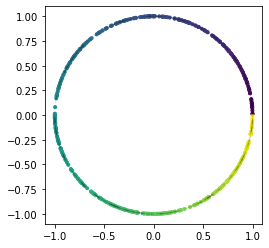

In [ ]:
# collapse
X, flows, labels = directed_circle()
plot_directed_2d(X, flows, labels)

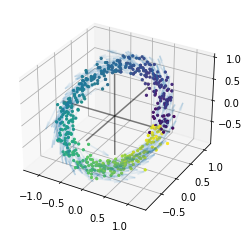

In [ ]:
# collapse
X, flows, labels = directed_circle(xtilt=np.pi/4, sigma=0.1)
plot_directed_3d(X, flows, labels, origin=True)

## Naive Spirals

We sample $\theta$ uniformly between $0$ and $2\pi \times$ `num_spirals` and calculate $x = r\theta\cos(\theta), y = r\theta\sin(\theta)$. The vector at each data point is tangent to the spiral and its length is proportional to $\theta$.

In [ ]:
# export
def directed_spiral(num_nodes=500, num_spirals=1.5, radius=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    """
    Sample `n` data points on a spiral.
    In addition to the points, returns a "flow" vector at each point. 

    Parameters
    -----------
    num_nodes : int, default=500
        Number of data points in shape.
    num_spirals : float, default=1.5
        Number of revolution.
    radius : float, default=1
        Radius of spiral.

    xtilt : float, default=0
        Angle to rotate around the x-axis.
    ytilt : float, default=0
        Angle to rotate around the y-axis.
    sigma : float, default=0
        Amount of gaussian noise
    inverse : bool, default=False
        Whether to flip the direction of flow
    """
    # sample random angles between 0 and num_spirals * 2pi
    thetas = np.random.uniform(0, num_spirals*2*np.pi, num_nodes)
    thetas = np.sort(thetas)
    labels = thetas
    # calculate x and y coordinates
    x = np.cos(thetas) * thetas * radius
    y = np.sin(thetas) * thetas * radius
    z = np.zeros(num_nodes)
    X = np.column_stack((x, y, z))
    # calculate the angle of the tangent
    alphas = thetas + np.pi/2
    # calculate the coordinates of the tangent
    u = np.cos(alphas) * thetas
    v = np.sin(alphas) * thetas
    w = np.zeros(num_nodes)
    flows = np.column_stack((u, v, w))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels

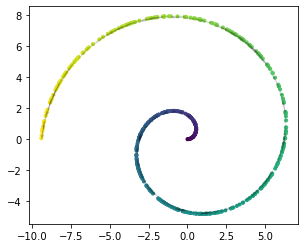

In [ ]:
# collapse
X, flows, labels = directed_spiral()
plot_directed_2d(X, flows, labels)

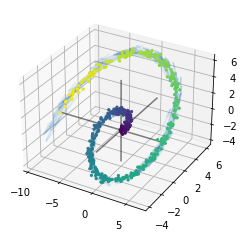

In [ ]:
# collapse
X, flows, labels = directed_spiral(xtilt=np.pi/4, sigma=0.2)
plot_directed_3d(X, flows, labels, origin=True)

## Uniform Spirals

We sample $\theta$ between $0$ and $2\pi \times$ `num_spirals` such that the probability of choosing $\theta_0$ is proportional to the value of $\theta_0$. We calculate $x = r\cos(\theta), y = r\sin(\theta)$. The vector at each data point is tangent to the spiral and is unit length.

In [ ]:
# export 
def directed_spiral_uniform(num_nodes=500, num_spirals=1.5, radius=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    """
    Sample `n` data points on a spiral.
    In addition to the points, returns a "flow" vector at each point. 

    Parameters
    -----------
    num_nodes : int, default=500
        Number of data points in shape.
    num_spirals : float, default=1.5
        Number of revolution.
    radius : float, default=1
        Radius of spiral.

    xtilt : float, default=0
        Angle to rotate around the x-axis.
    ytilt : float, default=0
        Angle to rotate around the y-axis.
    sigma : float, default=0
        Amount of gaussian noise
    inverse : bool, default=False
        Whether to flip the direction of flow
    """
    # sample random angles between 0 and num_spirals * 2pi
    t1 = np.random.uniform(0, num_spirals*2*np.pi, num_nodes)
    t2 = np.random.uniform(0, num_spirals*2*np.pi, num_nodes)
    thetas = np.maximum(t1, t2)
    thetas = np.sort(thetas)
    labels = thetas
    # calculate x and y coordinates
    x = np.cos(thetas) * thetas * radius
    y = np.sin(thetas) * thetas * radius
    z = np.zeros(num_nodes)
    X = np.column_stack((x, y, z))
    # calculate the angle of the tangent
    alphas = thetas + np.pi/2
    # calculate the coordinates of the tangent
    u = np.cos(alphas)
    v = np.sin(alphas)
    w = np.zeros(num_nodes)
    flows = np.column_stack((u, v, w))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels

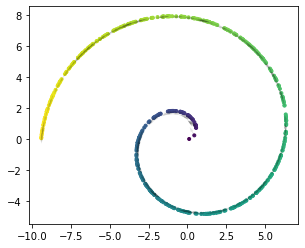

In [ ]:
# collapse
X, flows, labels = directed_spiral_uniform()
plot_directed_2d(X, flows, labels)

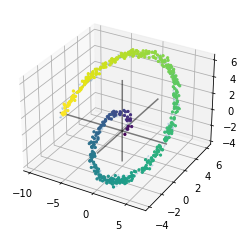

In [ ]:
# collapse
X, flows, labels = directed_spiral_uniform(xtilt=np.pi/4, sigma=0.2)
plot_directed_3d(X, flows, labels, origin=True)

## Delayed Spirals

We sample $\theta$ uniformly between $\pi \times$ `num_spirals` and $3\pi \times$ `num_spirals` and calculate $x = r\theta\cos(\theta), y = r\theta\sin(\theta)$. The vector at each data point is tangent to the spiral and its length is proportional to $\theta$.

In [ ]:
# export
def directed_spiral_delayed(num_nodes=500, num_spirals=1.5, radius=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    """
    Sample `n` data points on a spiral.
    In addition to the points, returns a "flow" vector at each point. 

    Parameters
    -----------
    num_nodes : int, default=500
        Number of data points in shape.
    num_spirals : float, default=1.5
        Number of revolution.
    radius : float, default=1
        Radius of spiral.

    xtilt : float, default=0
        Angle to rotate around the x-axis.
    ytilt : float, default=0
        Angle to rotate around the y-axis.
    sigma : float, default=0
        Amount of gaussian noise
    inverse : bool, default=False
        Whether to flip the direction of flow
    """
    # sample random angles between 0 and num_spirals * 2pi
    thetas = np.random.uniform(num_spirals*np.pi, num_spirals*3*np.pi, num_nodes)
    thetas = np.sort(thetas)
    labels = thetas
    # calculate x and y coordinates
    x = np.cos(thetas) * thetas * radius
    y = np.sin(thetas) * thetas * radius
    z = np.zeros(num_nodes)
    X = np.column_stack((x, y, z))
    # calculate the angle of the tangent
    alphas = thetas + np.pi/2
    # calculate the coordinates of the tangent
    u = np.cos(alphas) * thetas
    v = np.sin(alphas) * thetas
    w = np.zeros(num_nodes)
    flows = np.column_stack((u, v, w))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels

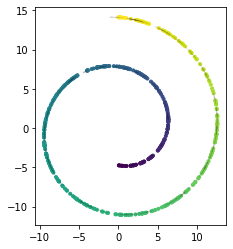

In [ ]:
# collapse
X, flows, labels = directed_spiral_delayed()
plot_directed_2d(X, flows, labels)

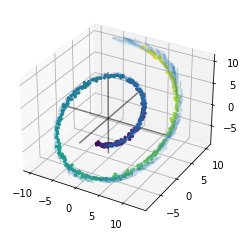

In [ ]:
# collapse
X, flows, labels = directed_spiral_delayed(xtilt=np.pi/4, sigma=0.2)
plot_directed_3d(X, flows, labels, origin=True)